In [1]:
import numpy as np
from matplotlib import pyplot as plt
from multifractal_analysis.double_trace_moment import get_eta_vs_kqeta_points
from multifractal_analysis.cascade_simulations import discreat_um_sym
from sklearn.linear_model import LinearRegression
from multifractal_analysis.regression_solution import RegressionSolution

# Read the Data Used in the Tutorial

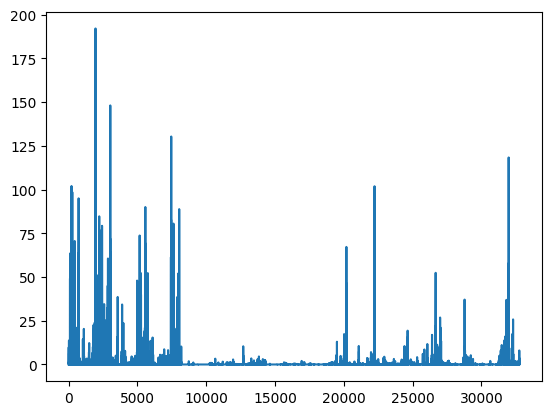

In [27]:
n = 15
alpha = 1.58
c1 = 0.38
data = discreat_um_sym(n, alpha, c1)
plt.plot(data)

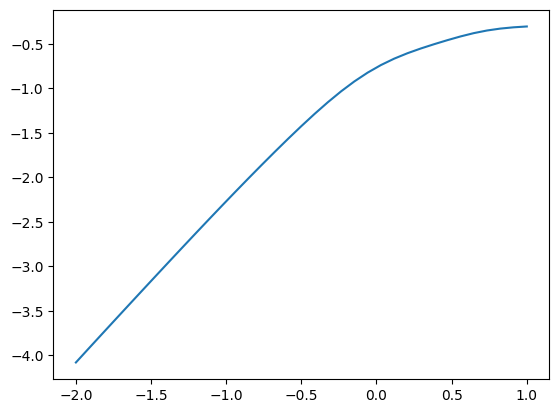

In [28]:
q = 1.5
lims = (-2.0, 1.0)
x, y = get_eta_vs_kqeta_points(data,q, lims=lims)
plt.plot(x,y)

In [29]:
zero_range = np.array([i for i in range(x.shape[0]) if -1.0 < x[i] < 0.0])
newx, newy = x[zero_range], y[zero_range]
n=5
max([RegressionSolution(newx[i:i+n], newy[i:i+n]).angular_coef for i in range(newy.shape[0] - n)])

1.697839453106818

In [32]:
def metric(alpha:float, r_square:float) -> float:
    return r_square + alpha

In [33]:
max([RegressionSolution(newx[i:i+n], newy[i:i+n]) for i in range(newy.shape[0] - n)], key= lambda x: metric(x.angular_coef, x.r_square))

RegressionSolution(angular_coef=1.697839453106818, linear_coef=-0.5672282552475199, r_square=0.9999138086166155, xpoints=array([-0.94117647, -0.85294118, -0.76470588, -0.67647059, -0.58823529]), ypoints=array([-2.16745301, -2.01438364, -1.86324341, -1.71440458, -1.56839572]))

In [6]:
from itertools import pairwise
def convolve(window:int, y:np.ndarray):
    return np.array([np.mean(y[i:i+window]) for i in range(y.shape[0])])

def derivada(x:np.ndarray,y:np.ndarray):
    dx = x[1] - x[0]
    return (x[:-1], np.array([(yf-y0)/dx for  y0, yf in pairwise(y)]))

def split_uncontinuous(x:np.ndarray):
    x = x.flatten()
    continuous = []
    curr_section = [x[0]]
    flag = True
    for el0, elf in pairwise(x):
        d = abs(elf - el0)
        if d > 5.0:
            continuous.append(np.array(curr_section))
            curr_section = [elf]
        else:
            curr_section.append(elf)
    
    continuous.append(np.array(curr_section))
    return [(item[0], item[-1]) for item in continuous if len(item) >= 5]

def plot_multiple(ax: plt.Axes, lines):
    ym = np.mean(ax.get_ybound())
    for cont in lines:
        xmin, xmax = cont[0], cont[-1]
        ax.hlines(ym, xmin, xmax, 'r')

In [8]:
n = 5
coef1 = max([RegressionSolution(sx[i:i+n], sy[i:i+n]).angular_coef for i in range(y.shape[0] - n)])
coef2 = max([RegressionSolution(x[i:i+n], y[i:i+n]).angular_coef for i in range(y.shape[0] - n)])
coef1, coef2

(1.4082459433665029, 1.590850053834659)

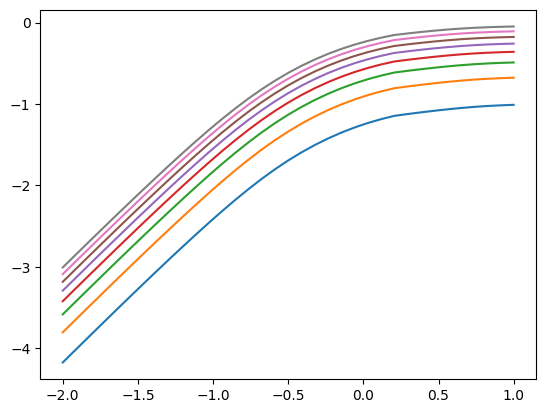

In [50]:
figure = plt.figure()
ax = figure.add_subplot(1,1,1)
qs = np.linspace(1.1, 1.9,8)
coefs = []
xs = []
ys = []
lims = (-2.0, 1.0)
for q in qs:
    x, y = get_eta_vs_kqeta_points(data,q, lims=lims)
    xs.append(x), ys.append(y)
    y = convolve(10, y)
    ax.plot(x,y)
    coefs.append(max([RegressionSolution(x[i:i+n], y[i:i+n]).angular_coef for i in range(y.shape[0] - n)]))

In [25]:
zero_range = np.array([i for i in range(x.shape[0]) if -1.0 < x[i] < 0.0])
newx, newy = x[zero_range], y[zero_range]
n=5
max([RegressionSolution(newx[i:i+n], newy[i:i+n]).angular_coef for i in range(newy.shape[0] - n)])

1.2671376932240863

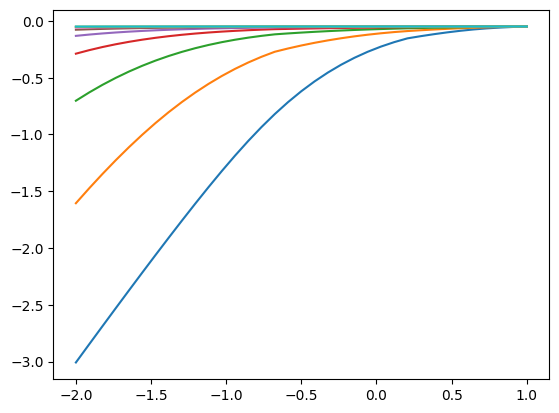

In [64]:
sx, sy = x, y
figure = plt.figure()
ax = figure.add_subplot(1,1,1)
for i in range(10):
    ax.plot(sx,sy)
    sy = convolve(20, sy)